In [13]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [14]:
boston = tf.keras.datasets.boston_housing

In [15]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [16]:
boston_data = boston.load_data()

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)


In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((404, 13), (404,), (102, 13), (102,))

In [19]:
scaler = StandardScaler()


In [20]:

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [21]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)          │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-3                  │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-4 (Dense)          │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [24]:

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [25]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 592.5045 - mae: 22.8152 - val_loss: 1825.6057 - val_mae: 40.1002
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 547.1038 - mae: 21.9596 - val_loss: 1124.4196 - val_mae: 32.2590
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 502.6659 - mae: 21.2289 - val_loss: 877.1386 - val_mae: 28.4086
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 530.5326 - mae: 21.7208 - val_loss: 771.8530 - val_mae: 26.8619
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 448.8334 - mae: 20.0623 - val_loss: 643.6577 - val_mae: 24.5992
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 370.8831 - mae: 18.0923 - val_loss: 299.6099 - val_mae: 16.3586
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 282.6981 - mae: 15.7813 - val_loss: 186.5306 - val_mae: 12.4724
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 162.1007 - mae: 11.3920 - val_loss: 71.6938 - val_mae: 6.6123
Epoch 9/20
13/13 ━━━━━━

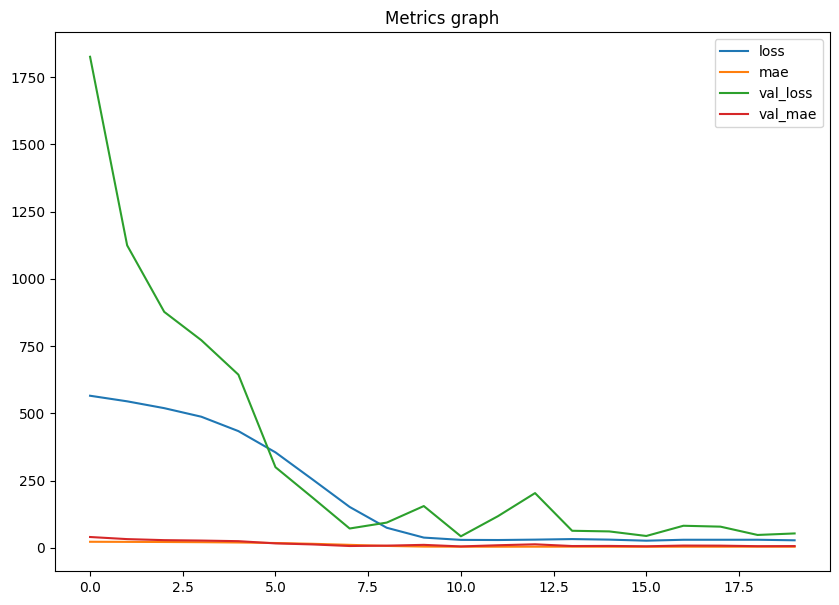

In [26]:

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [27]:


y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


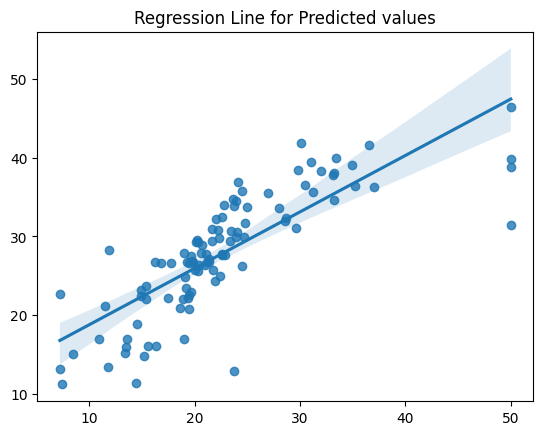

In [28]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()